In [145]:
import numpy as np
import matplotlib.pyplot as plt

import dynesty
import emcee
import corner
from tqdm import tqdm

In [146]:
muX, muY = 3, 5
sigmaX, sigmaY = 1, 1
sigma = np.array([sigmaX, sigmaY])
rhoXY = 0.3
mean = np.array([muX, muY])
cov = np.array([[sigmaX, rhoXY], [rhoXY, sigmaY]])

size = 1000

seed = 0
np.random.seed(seed)
data = np.random.multivariate_normal(mean, cov, size=size)

In [206]:
def log_likelihood(theta):
    
    muX, muY, sigmaX, sigmaY, rhoXY = theta
    mean = np.array([muX, muY])
    covXY =  np.array([[sigmaX, rhoXY], [rhoXY, sigmaY]])
    
    log_lr = 0
    
    for i in range(len(data)):
    
         log_lr += ((data[i,:] - mean).T@np.linalg.inv(covXY))@(data[i,:] - mean)
        
    return -0.5 * (len(data)*np.log(2*np.pi*np.linalg.det(covXY)) + float(log_lr.flatten()))

def log_prior(theta):
    
    muX, muY, sigmaX, sigmaY, rhoXY = theta
    
    if (1 <= muX <= 5 and 3 <= muY <= 7 and 0 <= sigmaX <= 2 and 0 <= sigmaY <= 2 
                                and 0.1 <= rhoXY <= 0.5):
        
        return 0.0
    
    return -np.inf

def log_probability(theta):
    
    lp = log_prior(theta)
    
    if not np.isfinite(lp):
        
        return -np.inf
    
    return lp + log_likelihood(theta)

def proposal(pos):
    
    return pos + np.random.randn(5)

In [203]:
# points = np.zeros((1000, 5))

# for i in range(1000):
    
#     points[i,:] = proposal(pos_init)
#     print(log_prior(points[i,:]))

In [204]:
muX_init, muY_init, sigmaX_init, sigmaY_init, rhoXY_init = 3, 5, 1, 1, 0.3 
pos_init = np.array([muX_init, muY_init, sigmaX_init, sigmaY_init, rhoXY_init])

nIters = 1000
accept = [pos_init]
reject = []

for i in tqdm(range(nIters)):
    
    pos_props = proposal(pos_init)
    log_lr = log_probability(pos_init)
    log_lr_prop = log_probability(pos_props)
    
    if(log_lr_prop/log_lr > 1):
        
        accept.append(pos_props)
        pos_init = pos_props
        
    elif(log_lr_prop/log_lr > np.random.rand()):
        
        accept.append(pos_props)
        pos_init = pos_props
            
    else:
            
        reject.append(pos_props)
        
accept = np.array(accept)
reject = np.array(reject)

100%|██████████| 1000/1000 [00:00<00:00, 34991.90it/s]


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-4.52086896, -3.76878206, -3.01669517, -2.26460827, -1.51252137,
        -0.76043448, -0.00834758,  0.74373931,  1.49582621,  2.2479131 ,
         3.        ]),
 <BarContainer object of 10 artists>)

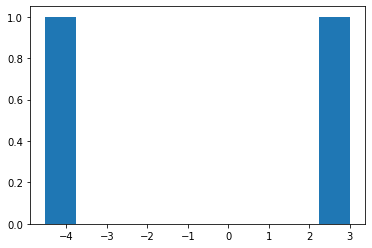

In [205]:
plt.hist(accept[:,0])